In [2]:
"""
The goal is to be able to produce meaningful plots of the raw data!
"""
PATH_PROFILES = "/home/mila/teaching/user07/Train/Profile/Profile.csv"
PATH_LIWC="/home/mila/teaching/user07/Train/Text/liwc.csv"
PATH_NRC="/home/mila/teaching/user07/Train/Text/nrc.csv"
PATH_LIKES="/home/mila/teaching/user07/Train/Relation/Relation.csv"
PATH_IMAGES="/home/mila/teaching/user07/Train/Image/oxford.csv"


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
profiles = pd.read_csv(PATH_PROFILES)
liwc = pd.read_csv(PATH_LIWC)
nrc = pd.read_csv(PATH_NRC)
likes = pd.read_csv(PATH_LIKES)
oxford = pd.read_csv(PATH_IMAGES)

In [5]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 9 columns):
Unnamed: 0    9500 non-null int64
userid        9500 non-null object
age           9500 non-null float64
gender        9500 non-null float64
ope           9500 non-null float64
con           9500 non-null float64
ext           9500 non-null float64
agr           9500 non-null float64
neu           9500 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 668.1+ KB


In [6]:
liwc = liwc.rename(columns={"userId":"userid"})
liwc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 82 columns):
userid      9500 non-null object
WC          9500 non-null int64
WPS         9500 non-null float64
Sixltr      9500 non-null float64
Dic         9500 non-null float64
Numerals    9500 non-null float64
funct       9500 non-null float64
pronoun     9500 non-null float64
ppron       9500 non-null float64
i           9500 non-null float64
we          9500 non-null float64
you         9500 non-null float64
shehe       9500 non-null float64
they        9500 non-null float64
ipron       9500 non-null float64
article     9500 non-null float64
verb        9500 non-null float64
auxverb     9500 non-null float64
past        9500 non-null float64
present     9500 non-null float64
future      9500 non-null float64
adverb      9500 non-null float64
preps       9500 non-null float64
conj        9500 non-null float64
negate      9500 non-null float64
quant       9500 non-null float64
number      

In [7]:
liwc.max()

userid     fff906fe1e890437fe0d9a1ce87abb09
WC                                      240
WPS                                     228
Sixltr                                  100
Dic                                     100
                         ...               
Quote                                 312.5
Apostro                               27.27
Parenth                                 550
OtherP                                 1600
AllPct                                85100
Length: 82, dtype: object

In [8]:
nrc = nrc.rename(columns={"userId":"userid"})
nrc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 11 columns):
userid          9500 non-null object
positive        9500 non-null float64
negative        9500 non-null float64
anger           9500 non-null float64
anticipation    9500 non-null float64
disgust         9500 non-null float64
fear            9500 non-null float64
joy             9500 non-null float64
sadness         9500 non-null float64
surprise        9500 non-null float64
trust           9500 non-null float64
dtypes: float64(10), object(1)
memory usage: 816.5+ KB


In [67]:
oxford = oxford.rename(columns={"userId":"userid"})
oxford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7174 entries, 0 to 7914
Data columns (total 66 columns):
userid                   7174 non-null object
faceID                   7174 non-null object
faceRectangle_width      7174 non-null int64
faceRectangle_height     7174 non-null int64
faceRectangle_left       7174 non-null int64
faceRectangle_top        7174 non-null int64
pupilLeft_x              7174 non-null float64
pupilLeft_y              7174 non-null float64
pupilRight_x             7174 non-null float64
pupilRight_y             7174 non-null float64
noseTip_x                7174 non-null float64
noseTip_y                7174 non-null float64
mouthLeft_x              7174 non-null float64
mouthLeft_y              7174 non-null float64
mouthRight_x             7174 non-null float64
mouthRight_y             7174 non-null float64
eyebrowLeftOuter_x       7174 non-null float64
eyebrowLeftOuter_y       7174 non-null float64
eyebrowLeftInner_x       7174 non-null float64
eyebrowLef

In [10]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 9 columns):
Unnamed: 0    9500 non-null int64
userid        9500 non-null object
age           9500 non-null float64
gender        9500 non-null float64
ope           9500 non-null float64
con           9500 non-null float64
ext           9500 non-null float64
agr           9500 non-null float64
neu           9500 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 668.1+ KB


In [11]:
#Need to think about plots to show...heatmaps, difference between gender/ageGroups/... vs features

In [12]:
#Plot histograms using pandas at a higher definition
def plotHist(df):
    fig = plt.figure(figsize = (15,20))
    ax = fig.gca()
    profiles.hist(ax = ax)

/home/mila/teaching/user07/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a72a0b048>,
      dtype=object)

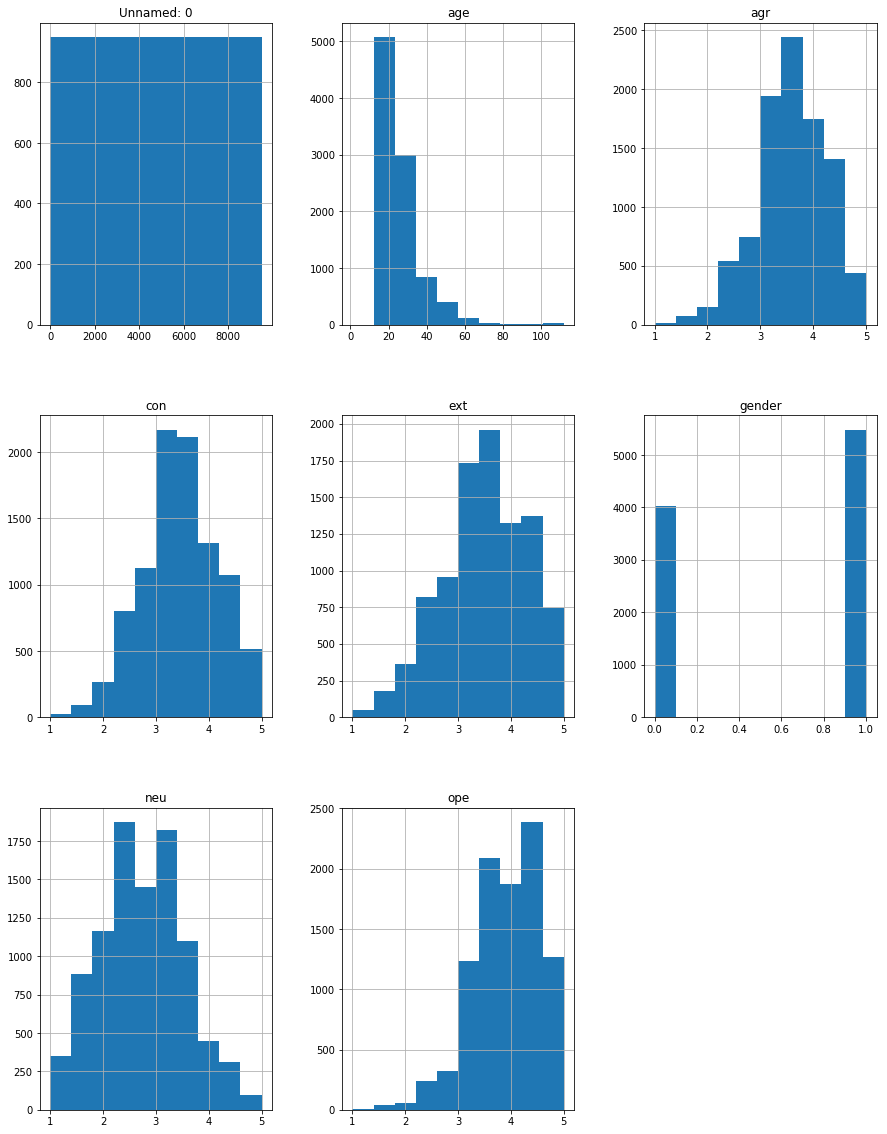

In [13]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
profiles.hist(ax = ax)

In [14]:
def makeAgeGroups(df):
    bins= [0,24,34,49,110]
    labels = ['xx-24','25-34','35-49','50-xx']
    df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=True) #include right side of bin
    #profiles1.head()

In [15]:
#Clean up profiles dataframe for plotting!
#This produces the scatterplots of profile data
#To use hue="cat", you need to conver the cat column into a str
profiles1 = profiles.iloc[:,2:] #no userid
profiles1.info()
#profiles1.gender==1
profiles1.gender = profiles.gender.apply(lambda x: 'Female' if x == 1 else 'Male')

#Make age categories
makeAgeGroups(profiles1)

#sns.pairplot(profiles1, hue="gender")
profiles1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 7 columns):
age       9500 non-null float64
gender    9500 non-null float64
ope       9500 non-null float64
con       9500 non-null float64
ext       9500 non-null float64
agr       9500 non-null float64
neu       9500 non-null float64
dtypes: float64(7)
memory usage: 519.7 KB


,age,gender,ope,con,ext,agr,neu
0,25-34,Male,4.00,2.25,2.20,3.60,2.80
1,xx-24,Male,4.20,3.35,2.45,3.90,2.60
2,25-34,Female,2.75,4.80,3.15,3.85,4.15
3,25-34,Female,3.40,3.20,2.10,3.70,2.35
4,25-34,Male,4.40,3.25,4.00,2.89,2.35


/home/mila/teaching/user07/miniconda3/envs/datascience/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


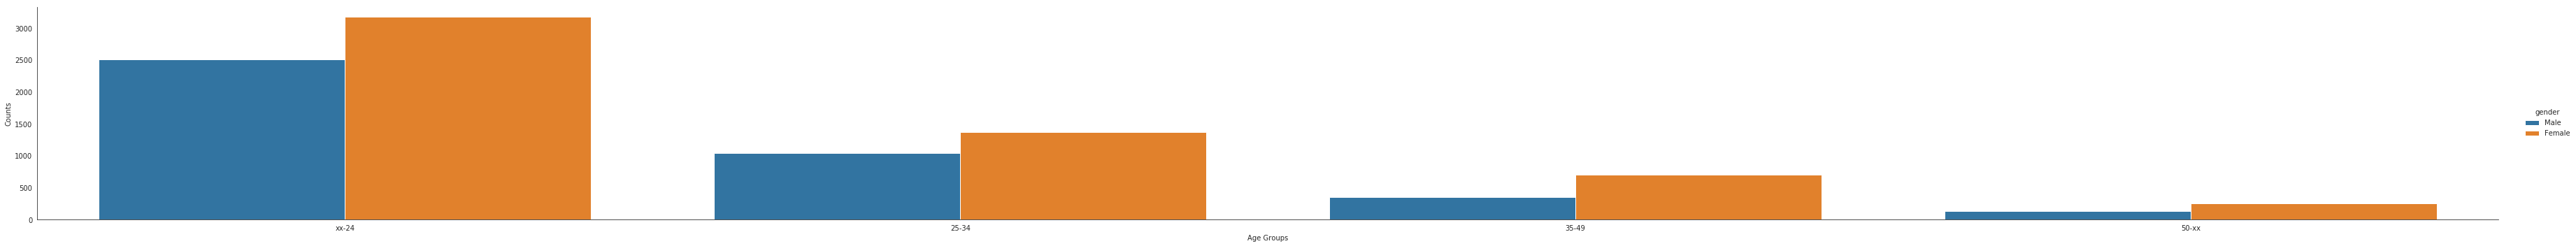

In [16]:
#
"""
Visualization of training data profiles

->Notice Gender class imbalance
->Personality traits are relatively well distributed and similar for woman and men for all age groups
    except agression and neuro women/men and age group
"""



#factorplot (age, hue=gender) ==>shows imbalance more female profiles in general, and repartition with age
#need a plot to summarize the personality traits...

#Make it better at some point...
with sns.axes_style('white'):
    g = sns.factorplot("age", data=profiles1, aspect=10.0, kind='count',
                       hue='gender')
    g.set_ylabels('Counts')
    g.set_xlabels('Age Groups')
    

#need a plot to summarize the personality traits...

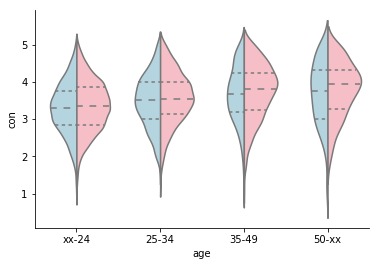

In [17]:
#Profiles and personality traits
with sns.axes_style(style=None):
    fig.set_size_inches(11.7, 8.27)
    viol_ope = sns.violinplot("age", "con", hue="gender", data=profiles1, scale="count",
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"],legend=False)
    plt.gca().legend_.remove() #removes legend...how to place it more convenient location???
    sns.despine()

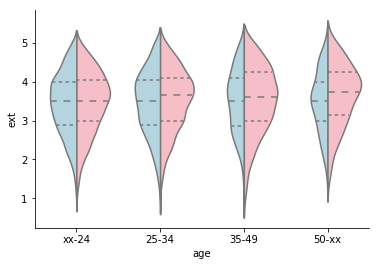

In [18]:
#Profiles and personality traits
with sns.axes_style(style=None):
    fig.set_size_inches(11.7, 8.27)
    viol_ope = sns.violinplot("age", "ext", hue="gender", data=profiles1, scale="count",
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"],legend=False)
    plt.gca().legend_.remove() #removes legend...how to place it more convenient location???
    sns.despine()

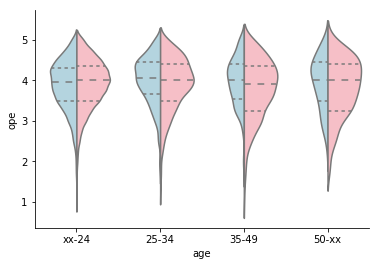

In [19]:
#Profiles and personality traits
with sns.axes_style(style=None):
    fig.set_size_inches(11.7, 8.27)
    viol_ope = sns.violinplot("age", "ope", hue="gender", data=profiles1, scale="count",
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"],legend=False)
    plt.gca().legend_.remove() #removes legend...how to place it more convenient location???
    sns.despine()

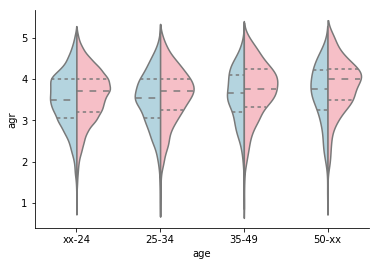

In [20]:
#Profiles and personality traits
with sns.axes_style(style=None):
    fig.set_size_inches(11.7, 8.27)
    viol_ope = sns.violinplot("age", "agr", hue="gender", data=profiles1, scale="count",
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"],legend=False)
    plt.gca().legend_.remove() #removes legend...how to place it more convenient location???
    sns.despine()

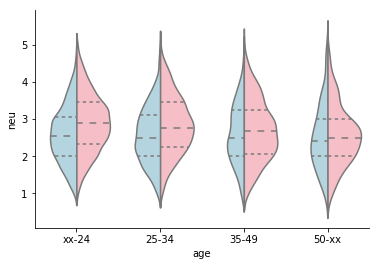

In [21]:
#Profiles and personality traits
with sns.axes_style(style=None):
    fig.set_size_inches(11.7, 8.27)
    viol_ope = sns.violinplot("age", "neu", hue="gender", data=profiles1, scale="count",
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"],legend=False)
    plt.gca().legend_.remove() #removes legend...how to place it more convenient location???
    sns.despine()

In [22]:
######################################################################################
"""
Visualization of the input data now
"""

'\nVisualization of the input data now\n'

In [23]:
#liwc
#let's merge users with liwc
liwc_profiles = profiles.merge(liwc, on="userid")
liwc_profiles=liwc_profiles.iloc[:,2:] #drop userid

In [24]:
liwc_profiles.head()
liwc_profiles.gender = liwc_profiles.gender.apply(lambda x: 'Female' if x == 1 else 'Male')
makeAgeGroups(liwc_profiles)

In [25]:
liwc_profiles.head()

,age,gender,ope,con,ext,agr,neu,WC,WPS,Sixltr,...,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,AllPct
0,25-34,Male,4.00,2.25,2.20,3.60,2.80,84,21.00,32.14,...,2.38,0.0,1.19,5.95,1.19,0.0,0.00,0.00,3.57,36.90
1,xx-24,Male,4.20,3.35,2.45,3.90,2.60,22,11.00,22.73,...,0.00,0.0,4.55,4.55,0.00,0.0,0.00,0.00,0.00,31.82
2,25-34,Female,2.75,4.80,3.15,3.85,4.15,185,92.50,21.62,...,0.00,0.0,1.08,3.24,2.16,0.0,0.54,0.00,1.08,25.41
3,25-34,Female,3.40,3.20,2.10,3.70,2.35,175,29.17,23.43,...,2.29,0.0,0.00,1.14,1.14,0.0,1.71,0.29,5.71,34.29
4,25-34,Male,4.40,3.25,4.00,2.89,2.35,188,20.89,14.89,...,0.53,0.0,0.53,3.19,2.13,0.0,2.66,0.00,2.13,24.47


In [26]:
####NRC FEATURES
#liwc
#let's merge users with liwc
nrc_profiles = profiles.merge(nrc, on="userid")
nrc_profiles=nrc_profiles.iloc[:,2:] #drop userid
nrc_profiles.gender = nrc_profiles.gender.apply(lambda x: 'Female' if x == 1 else 'Male')
makeAgeGroups(nrc_profiles)
nrc_profiles.head()

,age,gender,ope,con,ext,agr,neu,positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,25-34,Male,4.00,2.25,2.20,3.60,2.80,0.384615,0.615385,0.173913,0.086957,0.130435,0.130435,0.130435,0.130435,0.000000,0.217391
1,xx-24,Male,4.20,3.35,2.45,3.90,2.60,0.666667,0.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.166667,0.166667,0.000000
2,25-34,Female,2.75,4.80,3.15,3.85,4.15,0.892857,0.107143,0.018519,0.203704,0.018519,0.055556,0.314815,0.037037,0.111111,0.240741
3,25-34,Female,3.40,3.20,2.10,3.70,2.35,0.714286,0.285714,0.047619,0.222222,0.047619,0.063492,0.238095,0.158730,0.063492,0.158730
4,25-34,Male,4.40,3.25,4.00,2.89,2.35,0.761905,0.238095,0.062500,0.156250,0.031250,0.031250,0.281250,0.093750,0.093750,0.250000


In [76]:
####oxford FEATURES
#drop the multiple entries and keep only one randomly...ok, first one

oxford_mod = oxford.drop_duplicates(subset ="userid", keep = "first", inplace = False)
oxford_mod.faceRectangle_width = oxford_mod.faceRectangle_width.astype(np.float16)
oxford_mod.faceRectangle_height = oxford_mod.faceRectangle_height.astype(np.float16)
oxford_mod.faceRectangle_left = oxford_mod.faceRectangle_left.astype(np.float16)
oxford_mod.faceRectangle_top = oxford_mod.faceRectangle_top.astype(np.float16)
oxford_mod = oxford_mod.drop(columns=["faceID"])
oxford_mod.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7174 entries, 0 to 7914
Data columns (total 65 columns):
userid                   7174 non-null object
faceRectangle_width      7174 non-null float16
faceRectangle_height     7174 non-null float16
faceRectangle_left       7174 non-null float16
faceRectangle_top        7174 non-null float16
pupilLeft_x              7174 non-null float64
pupilLeft_y              7174 non-null float64
pupilRight_x             7174 non-null float64
pupilRight_y             7174 non-null float64
noseTip_x                7174 non-null float64
noseTip_y                7174 non-null float64
mouthLeft_x              7174 non-null float64
mouthLeft_y              7174 non-null float64
mouthRight_x             7174 non-null float64
mouthRight_y             7174 non-null float64
eyebrowLeftOuter_x       7174 non-null float64
eyebrowLeftOuter_y       7174 non-null float64
eyebrowLeftInner_x       7174 non-null float64
eyebrowLeftInner_y       7174 non-null float64
e

In [77]:
#let's merge users with liwc
oxford_mod_profiles = profiles.merge(oxford_mod, on="userid")
oxford_mod_profiles=oxford_mod_profiles.iloc[:,2:] #drop userid
oxford_mod_profiles.gender = oxford_mod_profiles.gender.apply(lambda x: 'Female' if x == 1 else 'Male')
makeAgeGroups(oxford_mod_profiles)
oxford_mod_profiles.head()

,age,gender,ope,con,ext,agr,neu,faceRectangle_width,faceRectangle_height,faceRectangle_left,...,underLipTop_x,underLipTop_y,underLipBottom_x,underLipBottom_y,facialHair_mustache,facialHair_beard,facialHair_sideburns,headPose_roll,headPose_yaw,headPose_pitch
0,25-34,Male,4.00,2.25,2.20,3.60,2.80,39.0,39.0,83.0,...,102.7,76.5,102.5,79.4,0.4,0.6,0.5,2.1,7.2,0.0
1,xx-24,Male,4.20,3.35,2.45,3.90,2.60,97.0,97.0,58.0,...,105.4,104.4,104.2,110.5,0.3,0.5,0.3,4.4,15.7,0.0
2,25-34,Female,2.75,4.80,3.15,3.85,4.15,86.0,86.0,79.0,...,123.2,149.1,123.2,155.8,0.0,0.0,0.0,2.2,37.4,0.0
3,25-34,Female,3.40,3.20,2.10,3.70,2.35,108.0,108.0,28.0,...,83.3,167.1,84.5,174.0,0.0,0.0,0.0,-4.4,-26.1,0.0
4,25-34,Male,4.40,3.25,4.00,2.89,2.35,113.0,113.0,1.0,...,55.0,115.0,53.8,120.2,0.1,0.3,0.2,9.5,16.1,0.0


In [44]:
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
import scipy.stats as ss
from collections import Counter
import math
from scipy import stats

#https://mlwhiz.com/blog/2019/04/19/awesome_seaborn_visuals/
#Numerical and categorical
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
flatui = sns.color_palette(flatui)

def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
    else:
        return converted
    
def conditional_entropy(x, y):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    :param x: list / NumPy ndarray / Pandas Series
        A sequence of measurements
    :param y: list / NumPy ndarray / Pandas Series
        A sequence of measurements
    :return: float
    """
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta

def associations(dataset, nominal_columns=None, mark_columns=False, theil_u=False, plot=True,
                          return_results = False, **kwargs):
    """
    Calculate the correlation/strength-of-association of features in data-set with both categorical (eda_tools) and
    continuous features using:
     - Pearson's R for continuous-continuous cases
     - Correlation Ratio for categorical-continuous cases
     - Cramer's V or Theil's U for categorical-categorical cases
    :param dataset: NumPy ndarray / Pandas DataFrame
        The data-set for which the features' correlation is computed
    :param nominal_columns: string / list / NumPy ndarray
        Names of columns of the data-set which hold categorical values. Can also be the string 'all' to state that all
        columns are categorical, or None (default) to state none are categorical
    :param mark_columns: Boolean (default: False)
        if True, output's columns' names will have a suffix of '(nom)' or '(con)' based on there type (eda_tools or
        continuous), as provided by nominal_columns
    :param theil_u: Boolean (default: False)
        In the case of categorical-categorical feaures, use Theil's U instead of Cramer's V
    :param plot: Boolean (default: True)
        If True, plot a heat-map of the correlation matrix
    :param return_results: Boolean (default: False)
        If True, the function will return a Pandas DataFrame of the computed associations
    :param kwargs:
        Arguments to be passed to used function and methods
    :return: Pandas DataFrame
        A DataFrame of the correlation/strength-of-association between all features
    """

    dataset = convert(dataset, 'dataframe')
    columns = dataset.columns
    if nominal_columns is None:
        nominal_columns = list()
    elif nominal_columns == 'all':
        nominal_columns = columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0,len(columns)):
        for j in range(i,len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                if columns[i] in nominal_columns:
                    if columns[j] in nominal_columns:
                        if theil_u:
                            corr[columns[j]][columns[i]] = theils_u(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = theils_u(dataset[columns[j]],dataset[columns[i]])
                        else:
                            cell = cramers_v(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = cell
                            corr[columns[j]][columns[i]] = cell
                    else:
                        cell = correlation_ratio(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                else:
                    if columns[j] in nominal_columns:
                        cell = correlation_ratio(dataset[columns[j]], dataset[columns[i]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                    else:
                        cell, _ = ss.pearsonr(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
    corr.fillna(value=np.nan, inplace=True)
    if mark_columns:
        marked_columns = ['{} (nom)'.format(col) if col in nominal_columns else '{} (con)'.format(col) for col in columns]
        corr.columns = marked_columns
        corr.index = marked_columns
    if plot:
        plt.figure(figsize=(20,20))#kwargs.get('figsize',None))
        sns.heatmap(corr, annot=kwargs.get('annot',False), fmt=kwargs.get('fmt','.2f'), cmap='coolwarm')
        plt.show()
    if return_results:
        return corr

In [28]:
#https://mlwhiz.com/blog/2019/04/19/awesome_seaborn_visuals/
#Numerical and categorical
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
flatui = sns.color_palette(flatui)

#we want numerical: the personality traits, nrc
#cat: age, gender

numcols = nrc_no_id.columns
catcols = ['age','gender']



player_df = player_df[numcols+ catcols]
nrc_corr = 


player_df = player_df.fillna(0)
results = associations(player_df,nominal_columns=catcols,return_results=True)


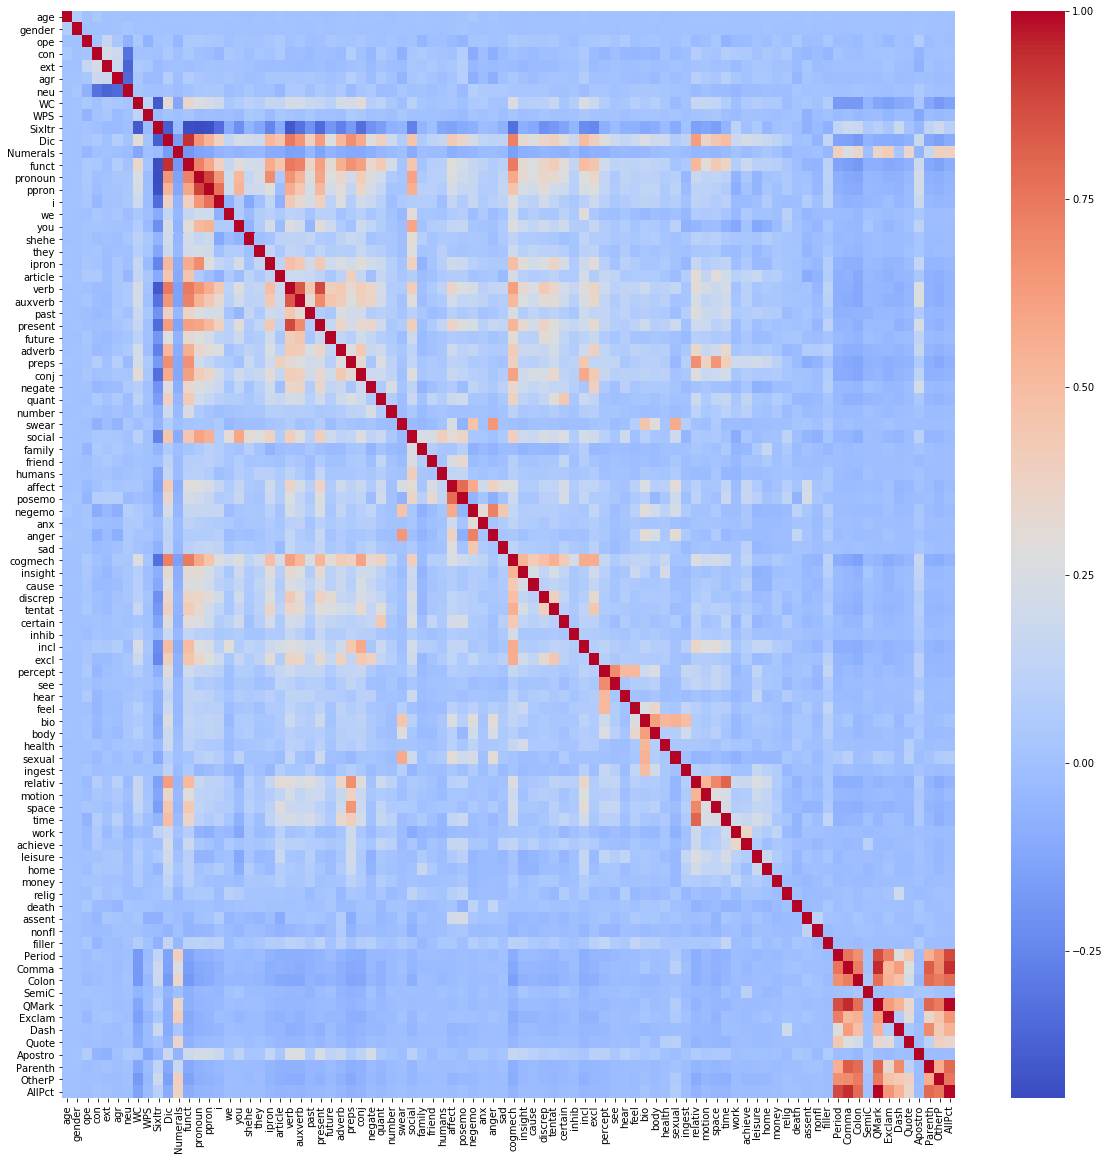

In [42]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
flatui = sns.color_palette(flatui)
results = associations(liwc_profiles,nominal_columns=['age','gender'],return_results=True)

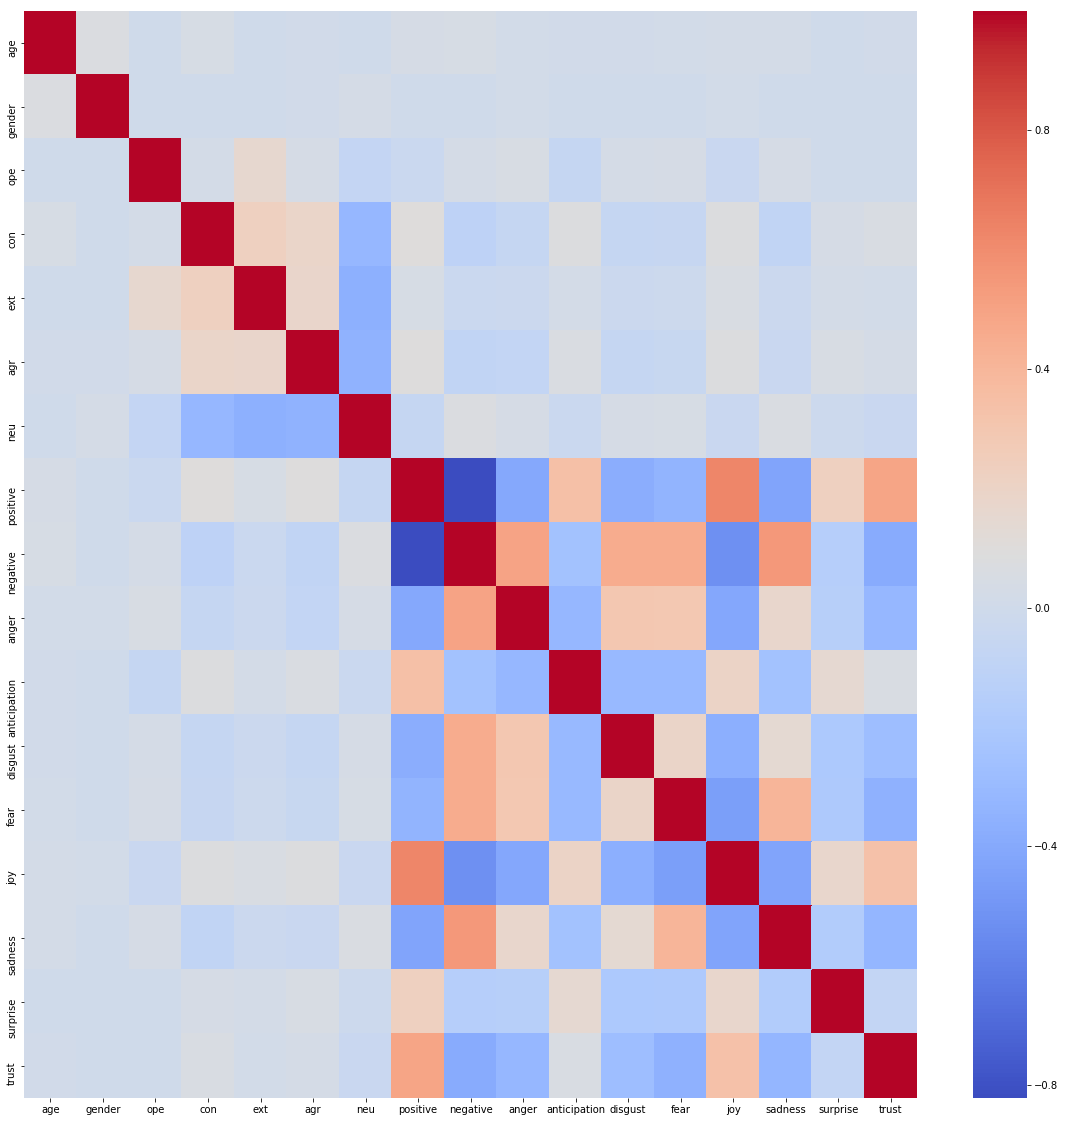

In [45]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
flatui = sns.color_palette(flatui)

results = associations(nrc_profiles,nominal_columns=['age','gender'],return_results=True)

/home/mila/teaching/user07/miniconda3/envs/datascience/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/mila/teaching/user07/miniconda3/envs/datascience/lib/python3.7/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/home/mila/teaching/user07/miniconda3/envs/datascience/lib/python3.7/site-packages/scipy/stats/stats.py:3036: RuntimeWarning: overflow encountered in reduce
  r_num = np.add.reduce(xm * ym)
/home/mila/teaching/user07/miniconda3/envs/datascience/lib/python3.7/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in half_scalars
  r = r_num / r_den
/home/mila/teaching/user07/miniconda3/envs/datascience/lib/python3.7/site-packages/scipy/stats/stats.py:3037: RuntimeWarning: invalid value encountered in multiply
  r_den = np.sqrt(_sum_of_squares(xm) * _sum_of_s

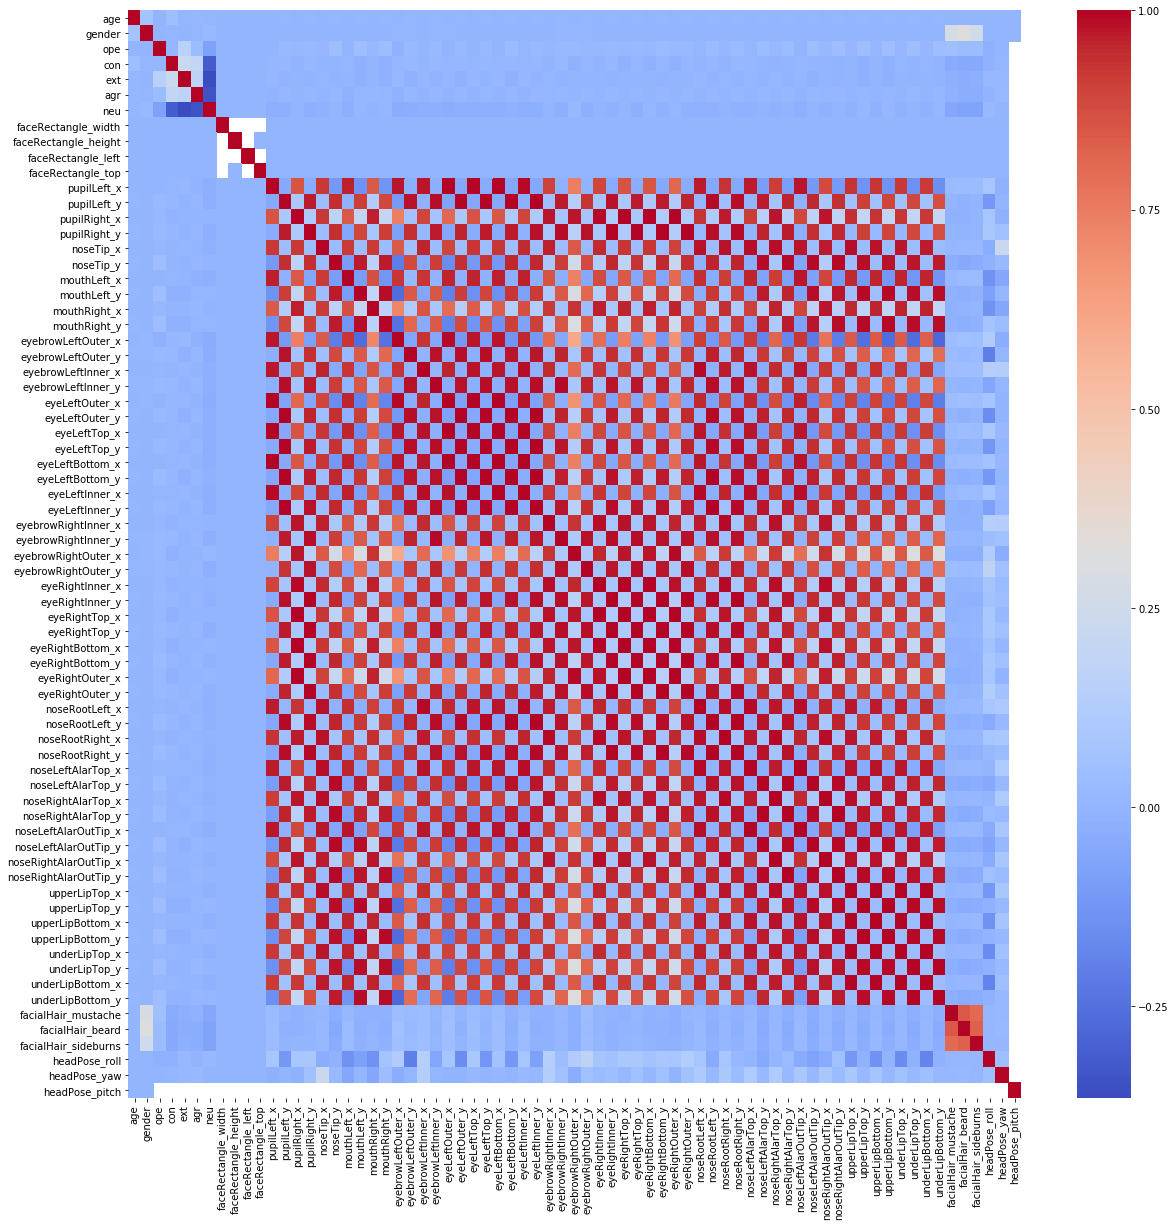

In [78]:
##Some errors in the heatmap for that one...
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
flatui = sns.color_palette(flatui)

results = associations(oxford_mod_profiles,nominal_columns=['age','gender'],return_results=True)

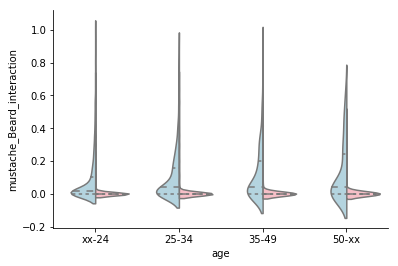

In [86]:
#Profiles and personality traits

#oxfacialHair = oxford_mod_profiles[['age', 'gender','facialHair_beard','facialHair_mustache']]

#with sns.axes_style(style=None):
#    fig.set_size_inches(11.7, 8.27)
#    viol_ope = sns.violinplot("age", "facialHair_beard", hue="gender", data=oxford_mod_profiles, scale="count",
#                   split=True, inner="quartile",
#                   palette=["lightblue", "lightpink"],legend=False)
#    plt.gca().legend_.remove() #removes legend...how to place it more convenient location???
#    sns.despine()

#adding an interaction mustache beard column:
oxford_mod_profiles['mustache_Beard_interaction'] = oxford_mod_profiles.facialHair_mustacheoxford_mod_profiles.facialHair_beard
#COMMENT: gender = b + b1*mustache + b2*beard + b3(some other feature characteristic of females) would do the trick

with sns.axes_style(style=None):
    fig.set_size_inches(11.7, 8.27)
    viol_ope = sns.violinplot("age", 'mustache_Beard_interaction', hue="gender", data=oxford_mod_profiles, scale="count",
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"],legend=False)
    plt.gca().legend_.remove() #removes legend...how to place it more convenient location???
    sns.despine()
    


In [ ]:
#Usefule stuff for later...

#Saving a picture:
bplot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)